# Machine Maintaince Urgency Score Prediction Model

Loading the data

In [37]:
import pandas as pd

df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

df.describe()

,Temperature (°C),Pressure (psi),Vibration (mm/s),Humidity (%),Component Wear Index,Maintenance Urgency Score
count,1799.000000,1797.00000,1799.000000,1798.000000,1800.000000,1800.000000
mean,45.239855,127.97507,2.775653,55.443159,0.536657,0.597967
std,12.748877,37.29974,1.144070,10.599259,0.220372,0.242439
min,28.300000,88.80000,0.500000,39.800000,0.125000,0.094000
25%,31.650000,92.00000,1.700000,45.825000,0.352250,0.396250
50%,45.500000,118.70000,2.800000,54.900000,0.520500,0.613500
75%,58.550000,175.00000,4.000000,67.100000,0.678000,0.806500
max,65.300000,186.10000,5.200000,72.800000,0.999000,0.999000


Data Preprocessing

In [38]:
# Find for the missing values

df.isnull().sum()

,0
Machinery Type,0
Temperature (°C),1
Pressure (psi),3
Vibration (mm/s),1
Humidity (%),2
Component Wear Index,0
Maintenance Urgency Score,0
Maintenance History,1260


In [39]:
# Handle Missing Values
# Only calculate the mean for numeric columns
numeric_df = df.select_dtypes(include=['number'])
df.fillna(numeric_df.mean(), inplace=True)

In [40]:
# No missing values

df.isnull().sum()

,0
Machinery Type,0
Temperature (°C),0
Pressure (psi),0
Vibration (mm/s),0
Humidity (%),0
Component Wear Index,0
Maintenance Urgency Score,0
Maintenance History,1260


In [41]:
# Convert 'Maintenance History' to numerical format
df['Maintenance History'] = df['Maintenance History'].map({'None': 0, 'Maintenance Record': 1})

In [42]:
df.isnull().sum()

,0
Machinery Type,0
Temperature (°C),0
Pressure (psi),0
Vibration (mm/s),0
Humidity (%),0
Component Wear Index,0
Maintenance Urgency Score,0
Maintenance History,1260


In [43]:
# Define features (X) and target variable (y)
X = df.drop(['Maintenance Urgency Score'], axis=1)  # Drop the target column to get features
y = df['Maintenance Urgency Score']  # Target column


Exploratory Data Analysis (EDA)

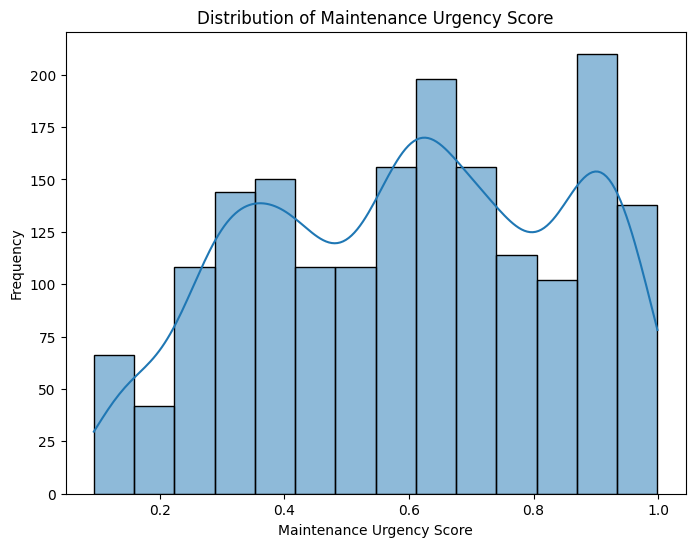

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Plot the distribution of the target variable (Maintenance Urgency Score)
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True)
plt.title("Distribution of Maintenance Urgency Score")
plt.xlabel("Maintenance Urgency Score")
plt.ylabel("Frequency")
plt.show()

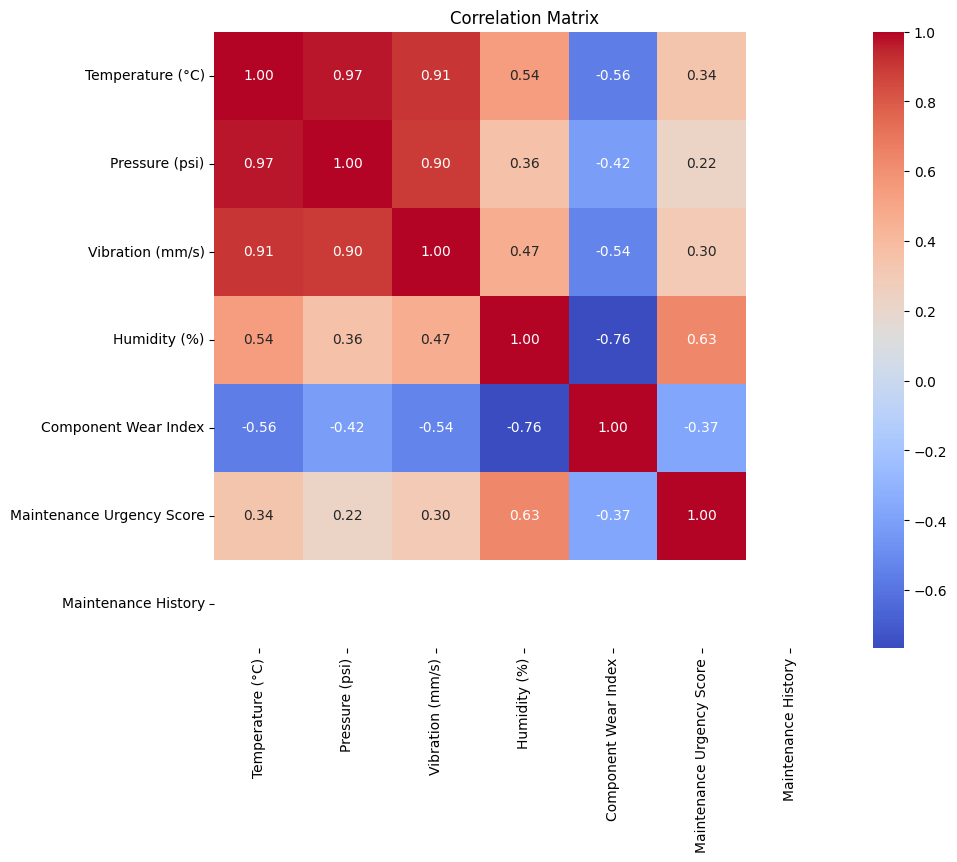

In [45]:
# Select only the numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [46]:
# Check all columns selected for correlation
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("Numeric columns for correlation:", numeric_columns)


Numeric columns for correlation: Index(['Temperature (°C)', 'Pressure (psi)', 'Vibration (mm/s)',
       'Humidity (%)', 'Component Wear Index', 'Maintenance Urgency Score',
       'Maintenance History'],
      dtype='object')


Splitting the Data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 1440 samples
Test set size: 360 samples


Training the Model

In [50]:
# Apply One-Hot Encoding to the 'Machinery Type' column
X_encoded = pd.get_dummies(X, columns=['Machinery Type'], drop_first=True)

# Check the new columns after encoding
X_encoded.head()

,Temperature (°C),Pressure (psi),Vibration (mm/s),Humidity (%),Component Wear Index,Maintenance History,Machinery Type_Conveyor B,Machinery Type_Pump A
0,45.6,120.5,3.2,68.3,0.158,NaN,False,True
1,28.3,90.2,1.8,42.7,0.829,1.0,True,False
2,60.7,180.0,4.5,55.2,0.421,NaN,False,False
3,32.1,95.8,2.1,47.5,0.628,NaN,True,False
4,51.2,130.7,3.9,72.8,0.276,1.0,False,True


In [51]:
# Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Check the size of the new training and testing sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 1440 samples
Test set size: 360 samples


Evaluating the Model

In [52]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [53]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.0005
Mean Squared Error (MSE): 0.0000
R² Score: 1.0000


In [54]:
from sklearn.model_selection import cross_val_score

# Cross-validation to check model performance
cv_scores = cross_val_score(model, X_encoded, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average Cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [-1.83572767e-04 -2.60608478e-07 -2.37268223e-07 -4.01186136e-07
 -2.81323619e-07]
Average Cross-validation score: -3.69506307544277e-05


In [55]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# print(f"Best parameters: {grid_search.best_params_}")


In [56]:
# Example of custom data (replace with actual values)
custom_data = {
    'Machinery Type': ['Compressor C'],  # This should be a categorical value
    'Temperature (°C)': [0.9],  # Example temperature
    'Pressure (psi)': [118.4],   # Example pressure
    'Vibration (mm/s)': [32.2],   # Example vibration
    'Humidity (%)': [46.5],      # Example humidity
    'Component Wear Index': [0.256]  # Example component wear index
}

# Convert custom data to DataFrame
custom_df = pd.DataFrame(custom_data)

# Apply the same One-Hot Encoding as done before on 'Machinery Type'
custom_df_encoded = pd.get_dummies(custom_df, columns=['Machinery Type'], drop_first=True)

# Make sure the columns match the training data (if needed, fill missing columns with 0)
custom_df_encoded = custom_df_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Use the trained model to make a prediction
predicted_urgency_score = model.predict(custom_df_encoded)

# Output the prediction
print(f"Predicted Maintenance Urgency Score: {predicted_urgency_score[0]:.4f}")


Predicted Maintenance Urgency Score: 0.3940


In [57]:
import joblib

# Save the preprocessed feature names
joblib.dump(X_train.columns, 'feature_columns.pkl')

# Save the trained model
joblib.dump(model, 'maintenance_model_updated.pkl')

['maintenance_model_updated.pkl']